In [2]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [8]:
rep_df_2d = pd.read_csv('data/2d-03_10_2018.csv')

#rep_df = pd.concat([rep_df_2d,rep_df_3d],sort=False)

In [9]:
code_df = rep_df_2d[(rep_df_2d['is_source']==True)& (rep_df_2d['binary_player_number_lines']>0) & \
                   ( rep_df_2d['analizo_total_loc']>5000 )]

In [10]:
code_df.shape

(29, 270)

In [11]:
code_df_dyn = code_df
code_df_dyn = code_df[code_df['binary_player_number_of_libraries']>0].copy()

In [12]:
pd.set_option('display.expand_frame_repr', True)
pd.set_option('max_colwidth', 800)
code_df_dyn = code_df_dyn.sort_values('binary_player_number_lines').reset_index(drop=True)
code_df_dyn[['binary_player_number_lines','analizo_total_loc','new_dir']]

,binary_player_number_lines,analizo_total_loc,new_dir
0,86975.0,6330.0,/home/se-metrics/root/proccesed1/2012_ChinaOpens_lntu_taac2012
1,107908.0,37740.0,/home/se-metrics/root/proccesed1/2014_LARC_tropeiros
2,109705.0,10563.0,/home/se-metrics/root/proccesed1/2014_WorldCup_Ri-oneRobocup2014
3,110348.0,22481.0,/home/se-metrics/root/proccesed1/2014_LARC_pmec_allejos2d
4,110650.0,10619.0,/home/se-metrics/root/proccesed1/2016_WorldCup_ITAndroids
5,113694.0,28937.0,/home/se-metrics/root/proccesed1/2016_WorldCup_HillStone
6,115331.0,10848.0,/home/se-metrics/root/proccesed1/2016_WorldCup_HfutEngine2016
7,115598.0,24533.0,/home/se-metrics/root/proccesed1/2012_WorldCup_robotto_soccer_simulation_2d
8,135465.0,6453.0,/home/se-metrics/root/proccesed1/2014_WorldCup_UFSJ2DRobocup2014
9,267605.0,32092.0,/home/se-metrics/root/proccesed1/2016_WorldCup_FCP_GPR_2014


## Disassembly LOC VS source code LOC 

### Plot

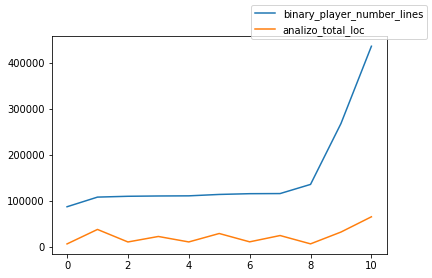

In [13]:
#sns.lineplot(data=code_df_dyn[['binary_player_number_lines','analizo_total_loc']],sort=True)
ax = code_df_dyn[['binary_player_number_lines','analizo_total_loc']].plot( legend=False)
#ax2 = ax.twinx()
#code_df_dyn.plot(y="analizo_total_loc", ax=ax2, legend=False, color="r",figsize=(10,5))
ax.figure.legend()
plt.show()

### Corrleation matrix 

In [45]:
code_df_dyn[['analizo_total_loc','binary_player_number_lines']].corr()

,analizo_total_loc,binary_player_number_lines
analizo_total_loc,1.000000,0.733698
binary_player_number_lines,0.733698,1.000000


## Disassembly LOC VS source code LOC 

### Plot

In [14]:
code_df_dyn = code_df_dyn.sort_values('player_function_cc_radare2_mean').reset_index(drop=True)
ax = code_df_dyn[['player_function_cc_radare2_mean']].plot(kind='scatter', legend=False)
ax2 = ax.twinx()
code_df_dyn.plot(y="analizo_accm_mean", ax=ax2, legend=False, color="r",figsize=(10,5))
ax.figure.legend()
plt.show()

ValueError: scatter requires an x and y column

### Corrleation matrix

In [47]:
code_df_dyn[['analizo_accm_mean','player_function_cc_radare2_mean']].corr()

,analizo_accm_mean,player_function_cc_radare2_mean
analizo_accm_mean,1.000000,-0.030779
player_function_cc_radare2_mean,-0.030779,1.000000
